## Importing Library

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='whitegrid',rc={'grid.linewidth':0.3})

In [220]:
#import the data
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### Data Description##### 
The input dataset has the following six attribute:
+ Request ID: A unique token representing a customer request.
+ Pickup point: Customer pickup point with two levels based on customer's location (City-represents customers to be picked up at the city and dropped to the airport; Airport-represents customers to be picked up from the airport and dropped to the city).
+ Driver ID: Unique identification number of a driver.
+ Status: It represents the customer request status and may take up one of three possible values; trip completed, cancelled or no cars available.
+ Request Timestamp: Contains date and time information at which the request was registered.
+ Drop Timestamp: Contains date and time information at which the trip was completed.mpleted.pleted.

In [221]:
#checking the dataset columns and datatypes
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [222]:
#cheking the null values
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [223]:
#check the status for which drop timestamp is not available
uber_data[uber_data['Drop timestamp'].isnull()]['Status'].value_counts()

Status
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [224]:
# Converting request and drop timestamp to datetime value from object datatype
uber_data['Request timestamp'] = pd.to_datetime(uber_data['Request timestamp'],dayfirst=True,format="mixed")
uber_data['Drop timestamp'] = pd.to_datetime(uber_data['Drop timestamp'], dayfirst=True,format="mixed")
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [225]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [226]:
uber_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Request id,6745.0,NaN,NaN,NaN,3384.644922,1.0,1691.0,3387.0,5080.0,6766.0,1955.099667
Pickup point,6745,2,City,3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver id,4095.0,NaN,NaN,NaN,149.501343,1.0,75.0,149.0,224.0,300.0,86.051994
Status,6745,3,Trip Completed,2831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Request timestamp,6745,NaN,NaN,NaN,2016-07-13 13:43:04.303039232,2016-07-11 00:00:00,2016-07-12 07:51:00,2016-07-13 14:23:37,2016-07-14 19:39:27,2016-07-15 23:59:58,NaN
Drop timestamp,2831,NaN,NaN,NaN,2016-07-13 13:15:33.899328768,2016-07-11 00:51:00,2016-07-12 07:42:00,2016-07-13 12:14:06,2016-07-14 19:13:52,2016-07-16 01:09:24,NaN


In [227]:
day_name_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
uber_data['Request_date'] = uber_data['Request timestamp'].dt.date
uber_data['Request_hour'] = uber_data['Request timestamp'].dt.hour
uber_data['Request_day'] = uber_data['Request timestamp'].dt.dayofweek.map(day_name_dict)


In [228]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_hour,Request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday


In [229]:
def get_time_slot(x):
    if x >=5 and x <= 10:
        slot = 'Morning Hours'
    elif x >10 and x <=14:
        slot ='Noon'
    elif x >14 and x <= 17:
        slot ='AfterNoon'
    elif x >17 and x <=21:
        slot = 'Evening'
    elif x >21 and x ==0:
        slot ='Night'
    else:
        slot ='Midnight'
    return slot
    

In [230]:
uber_data['Time_Slot'] = uber_data['Request_hour'].apply(get_time_slot)

In [231]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_hour,Request_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,AfterNoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Morning Hours
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Morning Hours


In [232]:
status_group = pd.DataFrame(uber_data.groupby('Status').size()).reset_index().rename(columns={0:'Number of Requests'})
total_num_request = status_group['Number of Requests'].sum()
status_group['Percentage of total request'] = round((status_group['Number of Requests']/total_num_request)*100,2)

In [233]:
status_group

,Status,Number of Requests,Percentage of total request
0,Cancelled,1264,18.74
1,No Cars Available,2650,39.29
2,Trip Completed,2831,41.97


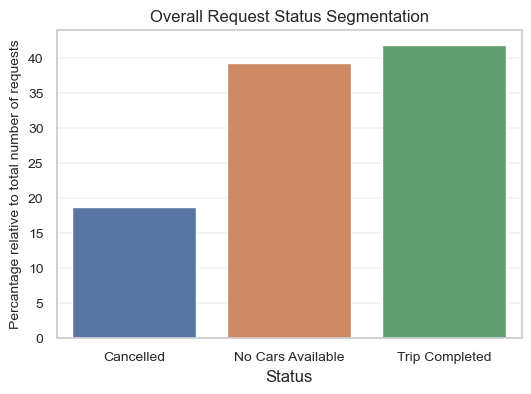

In [234]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=status_group, x='Status',y ='Percentage of total request')
ax.set_title('Overall Request Status Segmentation',fontsize=12)
ax.set_ylabel('Percantage relative to total number of requests',fontsize=10)
ax.tick_params(labelsize=10)
plt.show()

**The Issue of No Cars Available is almost the same percentage as Trip Completed By Uber Drivers**

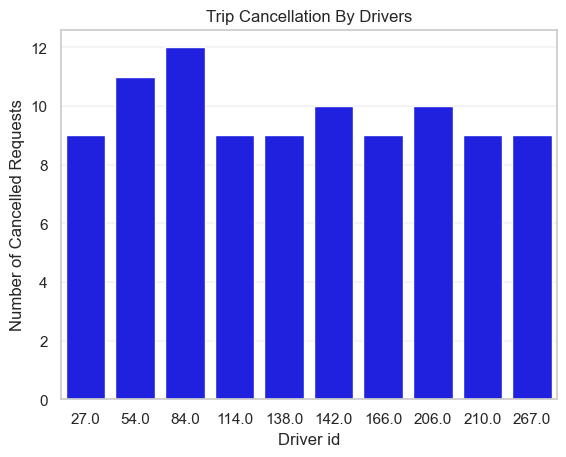

In [235]:
# check the top 10 drivers with most cancellation request
driver = pd.DataFrame(uber_data[uber_data['Status']=='Cancelled'].groupby('Driver id').size()).reset_index().rename(columns={0:'Number of Cancelled Requests'})
top_10_driver_cancellation = driver.sort_values('Number of Cancelled Requests',ascending=False).head(10)

ax = sns.barplot(data=top_10_driver_cancellation,x='Driver id', y='Number of Cancelled Requests',color='blue')
ax.set_title('Trip Cancellation By Drivers',fontsize=12)
plt.show()


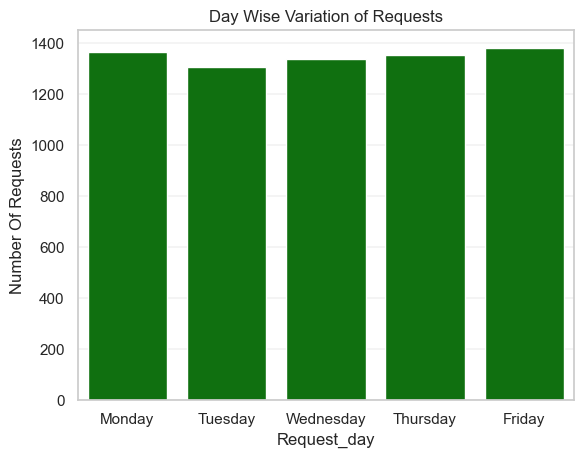

In [236]:
# Day Wise Variation  Of Requests
ax = sns.countplot(data=uber_data, x='Request_day', color='green')
ax.set_title('Day Wise Variation of Requests',fontsize=12)
ax.set_ylabel('Number Of Requests')
plt.show()

**Here is Very Minimal Variation in the number of requests generated with respect to the days of the week**

In [237]:
# status segmentations based on Pickup Point
uber_status_by_pickup = pd.DataFrame(uber_data.groupby(['Status','Pickup point']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_pickup = uber_status_by_pickup.sort_values(['Status','Number of Requests'],ascending=[True,False])
uber_status_by_pickup

,Status,Pickup point,Number of Requests
1,Cancelled,City,1066
0,Cancelled,Airport,198
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
5,Trip Completed,City,1504
4,Trip Completed,Airport,1327


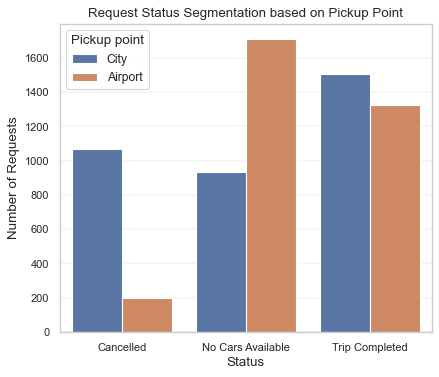

In [238]:
plt.figure(figsize=(6,5),dpi=80)
ax = sns.barplot(data=uber_status_by_pickup, x='Status',y ='Number of Requests',hue='Pickup point')
ax.set_title('Request Status Segmentation based on Pickup Point')
ax.tick_params(labelsize=10)
plt.show()

**the number of cancellation requests are high for city pickup and number of no cars available requests are high for airport pickup.**

In [239]:
# check for customer deniability w.r.t pickup point
uber_customer_denied  = uber_data[uber_data['Status'].isin(['Cancelled','No Cars Available'])]
uber_customer_denied_on_pickup = pd.DataFrame(uber_customer_denied.groupby('Pickup point').size()).reset_index().rename(columns={0:'Number of Requests Denied'})
uber_customer_denied_on_pickup

,Pickup point,Number of Requests Denied
0,Airport,1911
1,City,2003


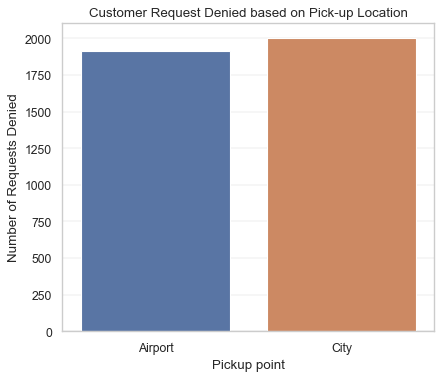

In [240]:
plt.figure(figsize=(6,5),dpi=80)
ax = sns.barplot(data=uber_customer_denied_on_pickup,x='Pickup point',y='Number of Requests Denied')
ax.set_title('Customer Request Denied based on Pick-up Location',fontsize=12)
plt.show()

**Plot  shows us that a higher number of requests are denied with customer pickup location as city than that of airport.**

In [241]:
uber_status_by_time_slot = pd.DataFrame(uber_data.groupby(['Time_Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot = uber_status_by_time_slot.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot.head(10)

,Time_Slot,Status,Number of Requests
2,AfterNoon,Trip Completed,344
1,AfterNoon,No Cars Available,326
0,AfterNoon,Cancelled,78
4,Evening,No Cars Available,1160
5,Evening,Trip Completed,633
3,Evening,Cancelled,131
7,Midnight,No Cars Available,518
8,Midnight,Trip Completed,471
6,Midnight,Cancelled,87
11,Morning Hours,Trip Completed,970


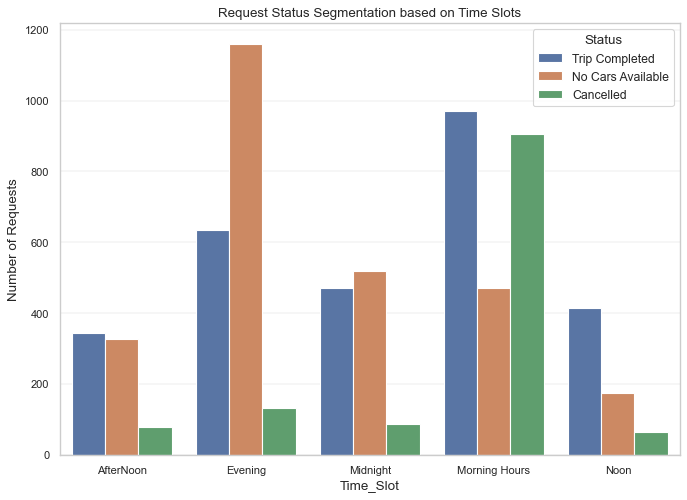

In [242]:
plt.figure(figsize=(10,7),dpi=80)
ax = sns.barplot(data=uber_status_by_time_slot,x='Time_Slot',y='Number of Requests',hue='Status')
ax.set_title('Request Status Segmentation based on Time Slots',fontsize=12)
ax.tick_params(labelsize=10)

**From the above plot we can observe that the number of cancellation requests are high during morning  hour and during evening hour there is a surge in no car available status. Clearly 'Morning  Hour' and 'Evening' are the most problematic time-slots contributing to the highest gap in overall supply and demand.**

In [243]:
# Status segmentation based on time slots and pickup point
uber_city_pickup = uber_data[uber_data['Pickup point'] == 'City']
uber_airport_pickup = uber_data[uber_data['Pickup point'] == 'Airport']

In [244]:
uber_status_by_time_slot_city = pd.DataFrame(uber_city_pickup.groupby(['Time_Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_city = uber_status_by_time_slot_city.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_city.head(5)

,Time_Slot,Status,Number of Requests
2,AfterNoon,Trip Completed,180
1,AfterNoon,No Cars Available,89
0,AfterNoon,Cancelled,34
5,Evening,Trip Completed,334
4,Evening,No Cars Available,54


In [245]:
uber_status_by_time_slot_airport = pd.DataFrame(uber_airport_pickup.groupby(['Time_Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_airport = uber_status_by_time_slot_airport.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_airport.head(5)

,Time_Slot,Status,Number of Requests
1,AfterNoon,No Cars Available,237
2,AfterNoon,Trip Completed,164
0,AfterNoon,Cancelled,44
4,Evening,No Cars Available,1106
5,Evening,Trip Completed,299


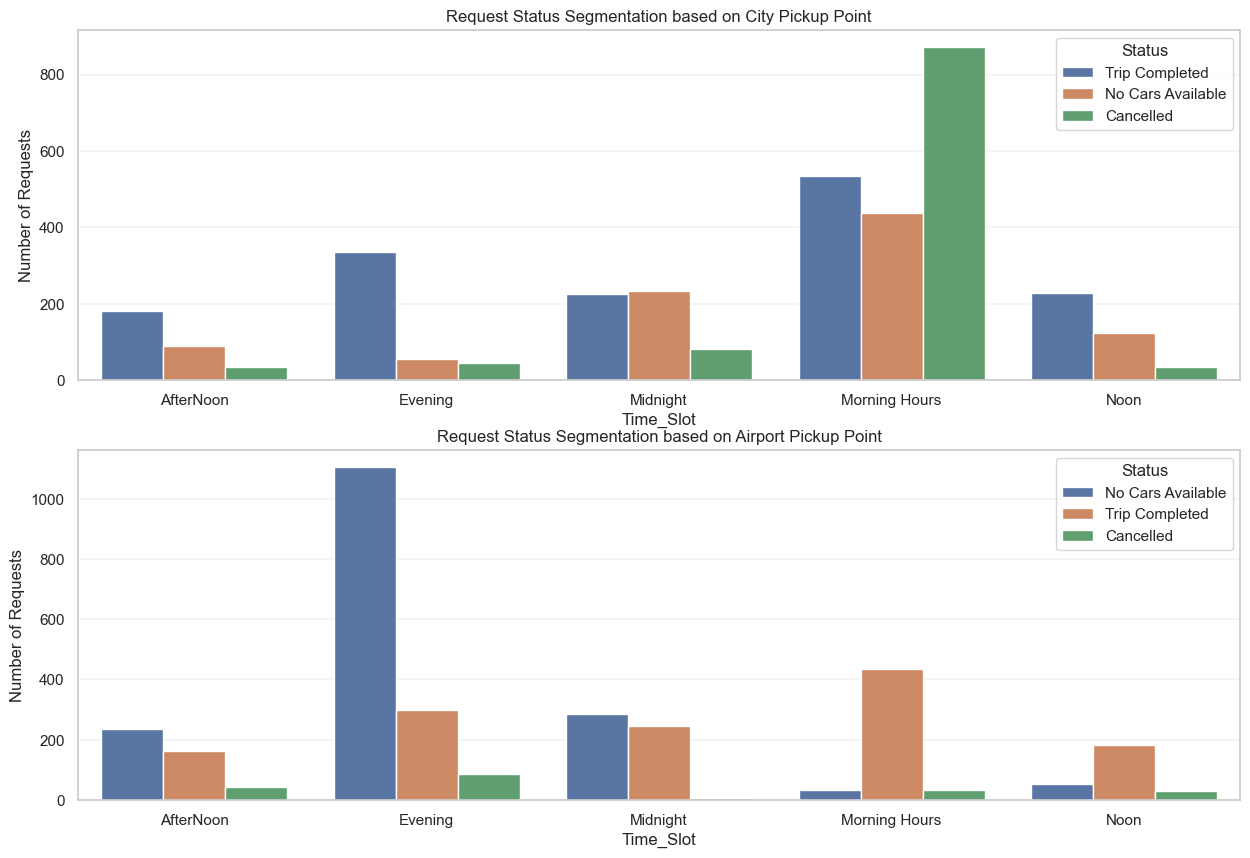

In [266]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
ax = sns.barplot(data=uber_status_by_time_slot_city,x='Time_Slot',y='Number of Requests',hue='Status')
ax.set_title('Request Status Segmentation based on City Pickup Point')

plt.subplot(2, 1, 2)
ay = sns.barplot(data=uber_status_by_time_slot_airport,x='Time_Slot',y='Number of Requests',hue='Status')
ay.set_title('Request Status Segmentation based on Airport Pickup Point')
plt.show()

In [247]:
uber_hourly_status = pd.DataFrame(uber_data.groupby(['Request_hour','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_hourly_status.head()

,Request_hour,Status,Number of Requests
0,0,Cancelled,3
1,0,No Cars Available,56
2,0,Trip Completed,40
3,1,Cancelled,4
4,1,No Cars Available,56


In [248]:
uber_hourly_status_transpose = pd.pivot_table(data=uber_hourly_status,columns='Status',values='Number of Requests',index='Request_hour')
uber_hourly_status_transpose = uber_hourly_status_transpose.reset_index().rename_axis(None,axis=1)
uber_hourly_status_transpose['Demand'] = uber_hourly_status_transpose.sum(axis=1)
uber_hourly_status_transpose['Supply'] = uber_hourly_status_transpose['Trip Completed']
uber_hourly_status_transpose['Gap'] = uber_hourly_status_transpose['Demand'] - uber_hourly_status_transpose['Supply']
uber_hourly_status_transpose.head()

,Request_hour,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,0,3.0,56.0,40.0,99.0,40.0,59.0
1,1,4.0,56.0,25.0,86.0,25.0,61.0
2,2,5.0,57.0,37.0,101.0,37.0,64.0
3,3,2.0,56.0,34.0,95.0,34.0,61.0
4,4,51.0,74.0,78.0,207.0,78.0,129.0


In [249]:
uber_hourly_total_metric = pd.melt(uber_hourly_status_transpose.loc[:,['Request_hour','Demand','Supply','Gap']], id_vars=['Request_hour'], var_name="Request Metric", value_name="Number of Requests").sort_values('Request_hour')
uber_hourly_total_metric.head(10)

,Request_hour,Request Metric,Number of Requests
0,0,Demand,99.0
48,0,Gap,59.0
24,0,Supply,40.0
1,1,Demand,86.0
49,1,Gap,61.0
25,1,Supply,25.0
2,2,Demand,101.0
50,2,Gap,64.0
26,2,Supply,37.0
51,3,Gap,61.0


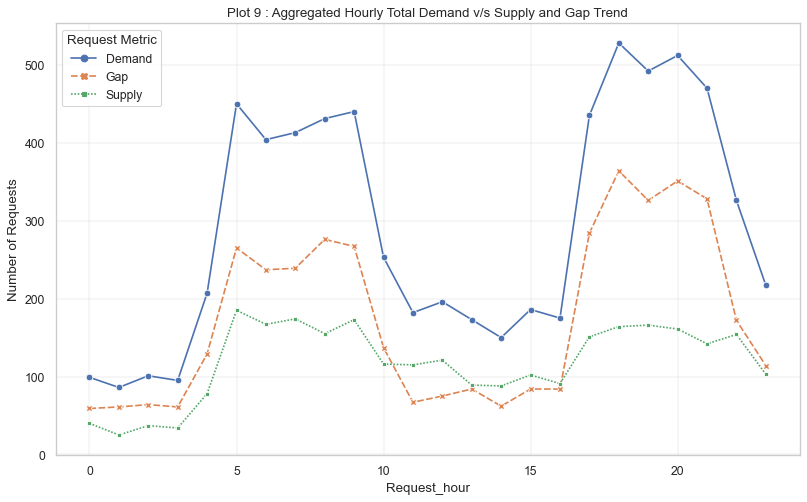

In [250]:
plt.figure(figsize=(12,7),dpi=80)
ax = sns.lineplot(data=uber_hourly_total_metric,x='Request_hour',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Plot 9 : Aggregated Hourly Total Demand v/s Supply and Gap Trend',fontsize=12)
plt.show()

**We chose a line plot to visualise the supply-demand gap since it clearly depicts the hourly trend of demand vs supply and the gap variation throughout the day. It is clearly evident from the plot that the highest gap exists from 5 AM to 9 AM(morning  hour) and between 5 pm and 9 pm in the evening.**

In [251]:
uber_status_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot,columns='Status',values='Number of Requests',index='Time_Slot')
uber_status_timeslot_transpose = uber_status_timeslot_transpose.reset_index().rename_axis(None,axis=1)

uber_status_timeslot_transpose['Demand'] = uber_status_timeslot_transpose.sum(axis=1,numeric_only=True)
uber_status_timeslot_transpose['Supply'] = uber_status_timeslot_transpose['Trip Completed']
uber_status_timeslot_transpose['Gap'] = uber_status_timeslot_transpose['Demand'] - uber_status_timeslot_transpose['Supply']

In [252]:
uber_status_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,AfterNoon,78.0,326.0,344.0,748.0,344.0,404.0
1,Evening,131.0,1160.0,633.0,1924.0,633.0,1291.0
2,Midnight,87.0,518.0,471.0,1076.0,471.0,605.0
3,Morning Hours,905.0,471.0,970.0,2346.0,970.0,1376.0
4,Noon,63.0,175.0,413.0,651.0,413.0,238.0


In [253]:
uber_status_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']]

,Time_Slot,Demand,Supply,Gap
0,AfterNoon,748.0,344.0,404.0
1,Evening,1924.0,633.0,1291.0
2,Midnight,1076.0,471.0,605.0
3,Morning Hours,2346.0,970.0,1376.0
4,Noon,651.0,413.0,238.0


In [254]:
uber_timeslot_total_metric = pd.melt(uber_status_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_timeslot_total_metric = uber_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
uber_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,AfterNoon,Demand,748.0
10,AfterNoon,Gap,404.0
5,AfterNoon,Supply,344.0
1,Evening,Demand,1924.0
11,Evening,Gap,1291.0


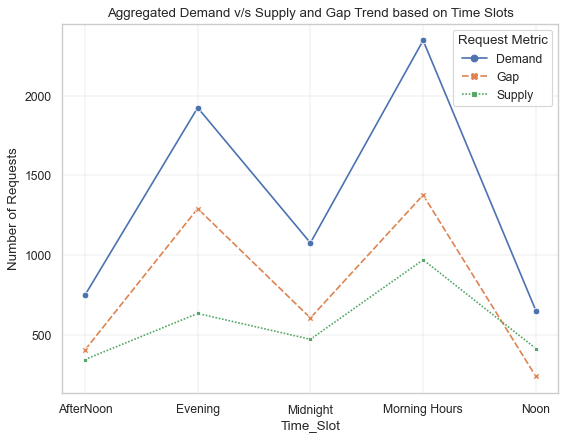

In [255]:
plt.figure(figsize=(8,6),dpi=80)
ax = sns.lineplot(data=uber_timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Aggregated Demand v/s Supply and Gap Trend based on Time Slots',fontsize=12)
plt.show()

**clearly shows that the timeslot with the highest gap are Morning and Evening Hours**

In [256]:
uber_city_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot_city,columns='Status',values='Number of Requests',index='Time_Slot')
uber_city_timeslot_transpose = uber_city_timeslot_transpose.reset_index().rename_axis(None,axis=1)

uber_city_timeslot_transpose['Demand'] = uber_city_timeslot_transpose.sum(axis=1,numeric_only=True)
uber_city_timeslot_transpose['Supply'] = uber_city_timeslot_transpose['Trip Completed']
uber_city_timeslot_transpose['Gap'] = uber_city_timeslot_transpose['Demand'] - uber_city_timeslot_transpose['Supply']

In [257]:
uber_city_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,AfterNoon,34.0,89.0,180.0,303.0,180.0,123.0
1,Evening,44.0,54.0,334.0,432.0,334.0,98.0
2,Midnight,82.0,234.0,226.0,542.0,226.0,316.0
3,Morning Hours,873.0,437.0,535.0,1845.0,535.0,1310.0
4,Noon,33.0,123.0,229.0,385.0,229.0,156.0


In [258]:
uber_city_timeslot_total_metric = pd.melt(uber_city_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_city_timeslot_total_metric = uber_city_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
uber_city_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,AfterNoon,Demand,303.0
10,AfterNoon,Gap,123.0
5,AfterNoon,Supply,180.0
1,Evening,Demand,432.0
11,Evening,Gap,98.0


In [259]:
uber_airport_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot_airport,columns='Status',values='Number of Requests',index='Time_Slot')
uber_airport_timeslot_transpose = uber_airport_timeslot_transpose.reset_index().rename_axis(None,axis=1)
uber_airport_timeslot_transpose['Demand'] = uber_airport_timeslot_transpose.sum(axis=1, numeric_only=True)
uber_airport_timeslot_transpose['Supply'] = uber_airport_timeslot_transpose['Trip Completed']
uber_airport_timeslot_transpose['Gap'] = uber_airport_timeslot_transpose['Demand'] - uber_airport_timeslot_transpose['Supply']

In [260]:
uber_airport_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,AfterNoon,44.0,237.0,164.0,445.0,164.0,281.0
1,Evening,87.0,1106.0,299.0,1492.0,299.0,1193.0
2,Midnight,5.0,284.0,245.0,534.0,245.0,289.0
3,Morning Hours,32.0,34.0,435.0,501.0,435.0,66.0
4,Noon,30.0,52.0,184.0,266.0,184.0,82.0


In [261]:
uber_city_timeslot_total_metric = pd.melt(uber_city_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_city_timeslot_total_metric = uber_city_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
uber_city_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,AfterNoon,Demand,303.0
10,AfterNoon,Gap,123.0
5,AfterNoon,Supply,180.0
1,Evening,Demand,432.0
11,Evening,Gap,98.0


In [262]:
uber_airport_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot_airport,columns='Status',values='Number of Requests',index='Time_Slot')
uber_airport_timeslot_transpose = uber_airport_timeslot_transpose.reset_index().rename_axis(None,axis=1)
uber_airport_timeslot_transpose['Demand'] = uber_airport_timeslot_transpose.sum(axis=1, numeric_only=True)
uber_airport_timeslot_transpose['Supply'] = uber_airport_timeslot_transpose['Trip Completed']
uber_airport_timeslot_transpose['Gap'] = uber_airport_timeslot_transpose['Demand'] - uber_airport_timeslot_transpose['Supply']

In [263]:
uber_airport_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,AfterNoon,44.0,237.0,164.0,445.0,164.0,281.0
1,Evening,87.0,1106.0,299.0,1492.0,299.0,1193.0
2,Midnight,5.0,284.0,245.0,534.0,245.0,289.0
3,Morning Hours,32.0,34.0,435.0,501.0,435.0,66.0
4,Noon,30.0,52.0,184.0,266.0,184.0,82.0


In [264]:
uber_airport_timeslot_total_metric = pd.melt(uber_airport_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_airport_timeslot_total_metric = uber_airport_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
uber_airport_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,AfterNoon,Demand,445.0
10,AfterNoon,Gap,281.0
5,AfterNoon,Supply,164.0
1,Evening,Demand,1492.0
11,Evening,Gap,1193.0


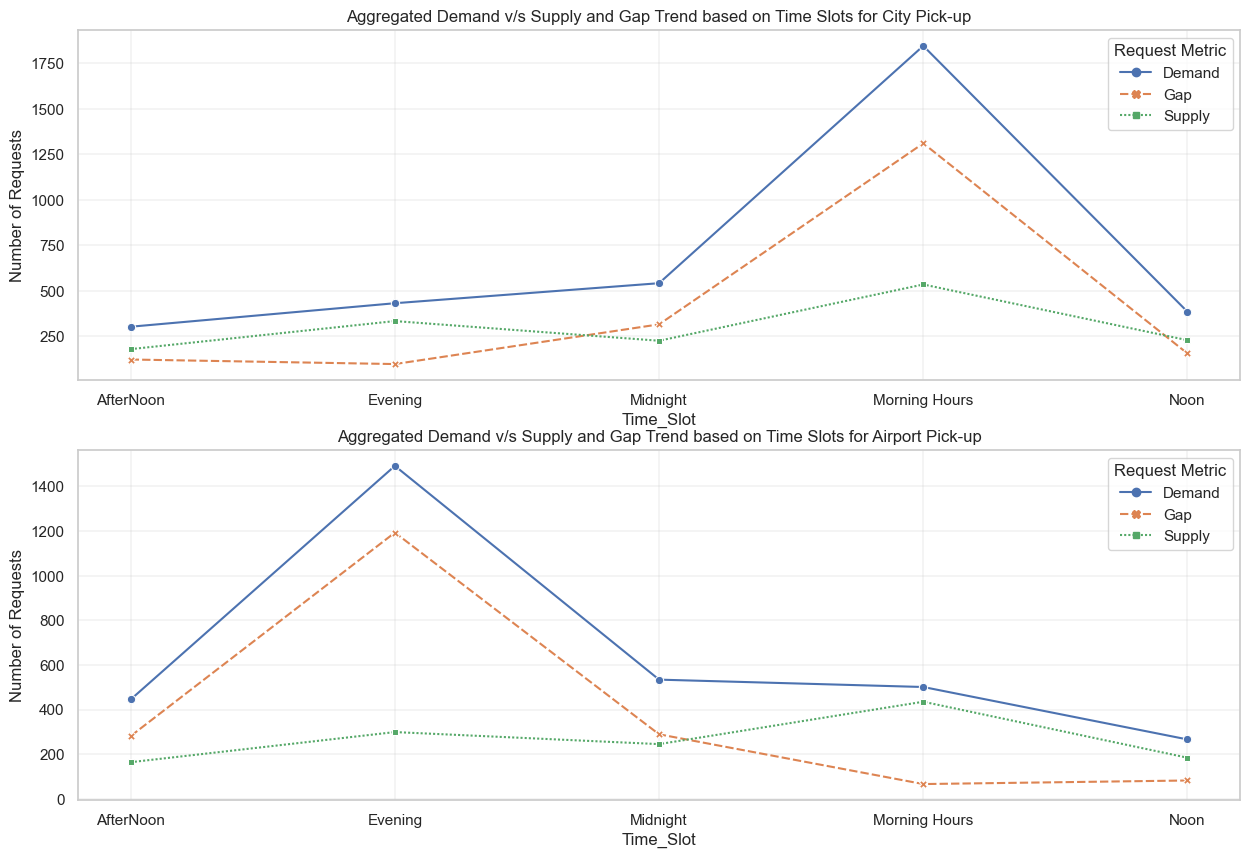

In [265]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=uber_city_timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Aggregated Demand v/s Supply and Gap Trend based on Time Slots for City Pick-up')

plt.subplot(2, 1, 2)
ay = sns.lineplot(data=uber_airport_timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ay.set_title('Aggregated Demand v/s Supply and Gap Trend based on Time Slots for Airport Pick-up')
plt.show()

**It is evident that the Demand vs Supply gap for Morning  Hour is most severe for requests from City to Airport.**

## Conclusion
**The analysis reveals significant supply-demand gaps during peak hours, with the highest issues observed in the morning and evening. Addressing these gaps could involve increasing driver availability during these times or offering incentives for drivers to work during peak demand periods. Further exploration and targeted strategies could help in balancing the supply-demand equilibrium more effectively.**